# PLOTLY INTRO

tutorial source (https://www.kaggle.com/kanncaa1/plotly-tutorial-for-beginners/notebook)

In [49]:
pip install plotly==3.10.0

Note: you may need to restart the kernel to use updated packages.


In [50]:
pip install wordcloud

Note: you may need to restart the kernel to use updated packages.


In [51]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


had to get the csv a different way because kaggle wasn't cooperating

In [52]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")

In [53]:
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

In [54]:
timesData.head(10)

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
0,1,Harvard University,United States of America,99.7,72.4,98.7,98.8,34.5,96.1,"20,152",8.9,25%,NaN,2011
1,2,California Institute of Technology,United States of America,97.7,54.6,98.0,99.9,83.7,96.0,"2,243",6.9,27%,33 : 67,2011
2,3,Massachusetts Institute of Technology,United States of America,97.8,82.3,91.4,99.9,87.5,95.6,"11,074",9.0,33%,37 : 63,2011
3,4,Stanford University,United States of America,98.3,29.5,98.1,99.2,64.3,94.3,"15,596",7.8,22%,42 : 58,2011
4,5,Princeton University,United States of America,90.9,70.3,95.4,99.9,-,94.2,"7,929",8.4,27%,45 : 55,2011
5,6,University of Cambridge,United Kingdom,90.5,77.7,94.1,94.0,57.0,91.2,"18,812",11.8,34%,46 : 54,2011
6,6,University of Oxford,United Kingdom,88.2,77.2,93.9,95.1,73.5,91.2,"19,919",11.6,34%,46 : 54,2011
7,8,"University of California, Berkeley",United States of America,84.2,39.6,99.3,97.8,-,91.1,"36,186",16.4,15%,50 : 50,2011
8,9,Imperial College London,United Kingdom,89.2,90.0,94.5,88.3,92.9,90.6,"15,060",11.7,51%,37 : 63,2011
9,10,Yale University,United States of America,92.1,59.2,89.7,91.5,-,89.5,"11,751",4.4,20%,50 : 50,2011


In [55]:
# prepare data frame
df = timesData.iloc[:100,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",
                    name = "citations",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.university_name)
# Creating trace2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines+markers",
                    name = "teaching",
                    marker = dict(color = 'rgba(80, 26, 80, 0.8)'),
                    text= df.university_name)
data = [trace1, trace2]
layout = dict(title = 'Citation and Teaching vs World Rank of Top 100 Universities',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [56]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= df2014.university_name)
# creating trace2
trace2 =go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= df2015.university_name)
# creating trace3
trace3 =go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= df2016.university_name)
data = [trace1, trace2, trace3]
layout = dict(title = 'Citation vs world rank of top 100 universities with 2014, 2015 and 2016 years',
              xaxis= dict(title= 'World Rank',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Citation',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [57]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
df2014

,world_rank,university_name,country,teaching,international,research,citations,income,total_score,num_students,student_staff_ratio,international_students,female_male_ratio,year
1002,1,California Institute of Technology,United States of America,94.4,65.8,98.2,99.8,91.2,94.9,"2,243",6.9,27%,33 : 67,2014
1003,2,Harvard University,United States of America,95.3,66.2,98.5,99.1,40.6,93.9,"20,152",8.9,25%,NaN,2014
1004,2,University of Oxford,United Kingdom,89.0,90.2,98.5,95.4,90.3,93.9,"19,919",11.6,34%,46 : 54,2014


In [58]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(10, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)),
                text = df2014.country)
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [59]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go

x = df2014.university_name

trace1 = {
  'x': x,
  'y': df2014.citations,
  'name': 'citation',
  'type': 'bar'
};
trace2 = {
  'x': x,
  'y': df2014.teaching,
  'name': 'teaching',
  'type': 'bar'
};
data = [trace1, trace2];
layout = {
  'xaxis': {'title': 'Top 3 universities'},
  'barmode': 'relative',
  'title': 'citations and teaching of top 3 universities in 2014'
};
fig = go.Figure(data = data, layout = layout)
iplot(fig)

In [60]:
# import graph objects as "go" and import tools
import plotly.graph_objs as go
from plotly import tools
import matplotlib.pyplot as plt
# prepare data frames
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

y_saving = [each for each in df2016.research]
y_net_worth  = [float(each) for each in df2016.income]
x_saving = [each for each in df2016.university_name]
x_net_worth  = [each for each in df2016.university_name]
trace0 = go.Bar(
                x=y_saving,
                y=x_saving,
                marker=dict(color='rgba(171, 50, 96, 0.6)',line=dict(color='rgba(171, 50, 96, 1.0)',width=1)),
                name='research',
                orientation='h',
)
trace1 = go.Scatter(
                x=y_net_worth,
                y=x_net_worth,
                mode='lines+markers',
                line=dict(color='rgb(63, 72, 204)'),
                name='income',
)
layout = dict(
                title='Citations and income',
                yaxis=dict(showticklabels=True,domain=[0, 0.85]),
                yaxis2=dict(showline=True,showticklabels=False,linecolor='rgba(102, 102, 102, 0.8)',linewidth=2,domain=[0, 0.85]),
                xaxis=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0, 0.42]),
                xaxis2=dict(zeroline=False,showline=False,showticklabels=True,showgrid=True,domain=[0.47, 1],side='top',dtick=25),
                legend=dict(x=0.029,y=1.038,font=dict(size=10) ),
                margin=dict(l=200, r=20,t=70,b=70),
                paper_bgcolor='rgb(248, 248, 255)',
                plot_bgcolor='rgb(248, 248, 255)',
)
annotations = []
y_s = np.round(y_saving, decimals=2)
y_nw = np.rint(y_net_worth)
# Adding labels
for ydn, yd, xd in zip(y_nw, y_s, x_saving):
    # labeling the scatter savings
    annotations.append(dict(xref='x2', yref='y2', y=xd, x=ydn - 4,text='{:,}'.format(ydn),font=dict(family='Arial', size=12,color='rgb(63, 72, 204)'),showarrow=False))
    # labeling the bar net worth
    annotations.append(dict(xref='x1', yref='y1', y=xd, x=yd + 3,text=str(yd),font=dict(family='Arial', size=12,color='rgb(171, 50, 96)'),showarrow=False))

layout['annotations'] = annotations

# Creating two subplots
fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]], shared_xaxes=True,
                          shared_yaxes=False, vertical_spacing=0.001)

fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 1, 2)

fig['layout'].update(layout)
iplot(fig)

This is the format of your plot grid:
[ (1,1) x1,y1 ]  [ (1,2) x2,y2 ]



In [61]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:7,:]
pie1 = df2016.num_students
pie1_list = [float(each.replace(',', '.')) for each in df2016.num_students]  # str(2,4) => str(2.4) = > float(2.4) = 2.4
labels = df2016.university_name
# figure
fig = {
  "data": [
    {
      "values": pie1_list,
      "labels": labels,
      "domain": {"x": [0, .5]},
      "name": "Number Of Students Rates",
      "hoverinfo":"label+percent+name",
      "hole": .3,
      "type": "pie"
    },],
  "layout": {
        "title":"Universities Number of Students rates",
        "annotations": [
            { "font": { "size": 20},
              "showarrow": False,
              "text": "Number of Students",
                "x": 0.20,
                "y": 1
            },
        ]
    }
}
iplot(fig)

In [62]:
df2016.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 1803 to 1809
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              7 non-null      object 
 1   university_name         7 non-null      object 
 2   country                 7 non-null      object 
 3   teaching                7 non-null      float64
 4   international           7 non-null      object 
 5   research                7 non-null      float64
 6   citations               7 non-null      float64
 7   income                  7 non-null      object 
 8   total_score             7 non-null      object 
 9   num_students            7 non-null      object 
 10  student_staff_ratio     7 non-null      float64
 11  international_students  7 non-null      object 
 12  female_male_ratio       6 non-null      object 
 13  year                    7 non-null      int64  
dtypes: float64(4), int64(1), object(9)
memor

In [63]:
# data preparation
df2016 = timesData[timesData.year == 2016].iloc[:20,:]
num_students_size  = [float(each.replace(',', '.')) for each in df2016.num_students]
international_color = [float(each) for each in df2016.international]
data = [
    {
        'y': df2016.teaching,
        'x': df2016.world_rank,
        'mode': 'markers',
        'marker': {
            'color': international_color,
            'size': num_students_size,
            'showscale': True
        },
        "text" :  df2016.university_name    
    }
]
iplot(data)

In [64]:
# prepare data
x2011 = timesData.student_staff_ratio[timesData.year == 2011]
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

trace1 = go.Histogram(
    x=x2011,
    opacity=0.75,
    name = "2011",
    marker=dict(color='rgba(171, 50, 96, 0.6)'))
trace2 = go.Histogram(
    x=x2012,
    opacity=0.75,
    name = "2012",
    marker=dict(color='rgba(12, 50, 196, 0.6)'))

data = [trace1, trace2]
layout = go.Layout(barmode='overlay',
                   title=' students-staff ratio in 2011 and 2012',
                   xaxis=dict(title='students-staff ratio'),
                   yaxis=dict( title='Count'),
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)

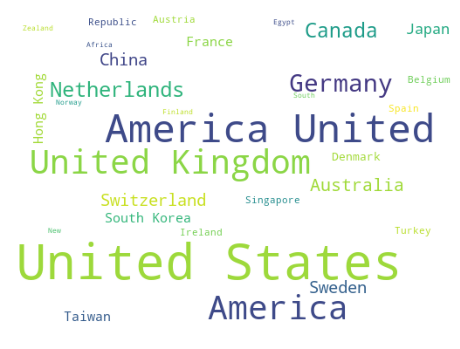

In [65]:
# data prepararion
x2011 = timesData.country[timesData.year == 2011]
plt.subplots(figsize=(8,8))
wordcloud = WordCloud(
                          background_color='white',
                          width=512,
                          height=384
                         ).generate(" ".join(x2011))
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('graph.png')

plt.show()

In [66]:
# data preparation
x2015 = timesData[timesData.year == 2015]

trace0 = go.Box(
    y=x2015.total_score,
    name = 'total score of universities in 2015',
    marker = dict(
        color = 'rgb(12, 12, 140)',
    )
)
trace1 = go.Box(
    y=x2015.research,
    name = 'research of universities in 2015',
    marker = dict(
        color = 'rgb(12, 128, 128)',
    )
)
data = [trace0, trace1]
iplot(data)

In [67]:
# import figure factory
import plotly.figure_factory as ff
# prepare data
dataframe = timesData[timesData.year == 2015]
data2015 = dataframe.loc[:,["research","international", "total_score"]]
data2015["index"] = np.arange(1,len(data2015)+1)
# scatter matrix
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index',colormap='Portland',
                                  colormap_type='cat',
                                  height=700, width=700)
iplot(fig)

In [68]:
# first line plot
trace1 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.teaching,
    name = "teaching",
    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
)
# second line plot
trace2 = go.Scatter(
    x=dataframe.world_rank,
    y=dataframe.income,
    xaxis='x2',
    yaxis='y2',
    name = "income",
    marker = dict(color = 'rgba(160, 112, 20, 0.8)'),
)
data = [trace1, trace2]
layout = go.Layout(
    xaxis2=dict(
        domain=[0.6, 0.95],
        anchor='y2',        
    ),
    yaxis2=dict(
        domain=[0.6, 0.95],
        anchor='x2',
    ),
    title = 'Income and Teaching vs World Rank of Universities'

)

fig = go.Figure(data=data, layout=layout)
iplot(fig)

In [69]:
# create trace 1 that is 3d scatter
trace1 = go.Scatter3d(
    x=dataframe.world_rank,
    y=dataframe.research,
    z=dataframe.citations,
    mode='markers',
    marker=dict(
        size=10,
        color='rgb(255,0,0)',                # set color to an array/list of desired values      
    )
)

data = [trace1]
layout = go.Layout(
    margin=dict(
        l=0,
        r=0,
        b=0,
        t=0  
    )
    
)
fig = go.Figure(data=data, layout=layout)
iplot(fig)


More graphing but this time with a project csv built using the Spotify API

In [70]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# plotly
import plotly.plotly as py
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory


In [71]:
# Load data that we will use.
songlist = pd.read_csv("https://raw.githubusercontent.com/QMIND-Team/QMIND-Music/master/research/Spotify%20Data/song_list")

In [72]:
# information about timesData
songlist.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3988 entries, 0 to 3987
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artists           3983 non-null   object 
 1   songs             3988 non-null   object 
 2   danceability      3988 non-null   float64
 3   energy            3988 non-null   float64
 4   key               3988 non-null   int64  
 5   loudness          3988 non-null   float64
 6   mode              3988 non-null   int64  
 7   speechiness       3988 non-null   float64
 8   acousticness      3988 non-null   float64
 9   instrumentalness  3988 non-null   float64
 10  liveness          3988 non-null   float64
 11  valence           3988 non-null   float64
 12  tempo             3988 non-null   float64
 13  type              3988 non-null   object 
 14  id                3988 non-null   object 
 15  uri               3988 non-null   object 
 16  track_href        3988 non-null   object 


In [73]:
songlist.head(10)

,artists,songs,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature,happy/sad
0,Ramones,Merry Christmas (I Don't Wanna Fight Tonight) ...,0.4750,0.9350,0,-6.454,1,0.0488,0.03600,0.000003,...,0.8180,151.902,audio_features,7EGQaR9y8XyKeDW7jiDndI,spotify:track:7EGQaR9y8XyKeDW7jiDndI,https://api.spotify.com/v1/tracks/7EGQaR9y8XyK...,https://api.spotify.com/v1/audio-analysis/7EGQ...,123600,4,1
1,David Guetta,Would I Lie To You - Extended,0.7400,0.7670,7,-6.264,0,0.2260,0.00334,0.000007,...,0.7090,124.023,audio_features,6rdMvRjvA5518Q5rmqZLH0,spotify:track:6rdMvRjvA5518Q5rmqZLH0,https://api.spotify.com/v1/tracks/6rdMvRjvA551...,https://api.spotify.com/v1/audio-analysis/6rdM...,288070,4,1
2,Hailee Steinfeld,Love Myself,0.6170,0.7590,0,-6.785,0,0.0677,0.00260,0.000000,...,0.3240,122.925,audio_features,36phXHOKx8rO7CMp2vNX4x,spotify:track:36phXHOKx8rO7CMp2vNX4x,https://api.spotify.com/v1/tracks/36phXHOKx8rO...,https://api.spotify.com/v1/audio-analysis/36ph...,218773,4,1
3,Tove Lo,Influence,0.7680,0.5930,5,-9.643,0,0.0463,0.09930,0.000184,...,0.3290,104.954,audio_features,6IFwG4pnVPcpwX4kXFUbsV,spotify:track:6IFwG4pnVPcpwX4kXFUbsV,https://api.spotify.com/v1/tracks/6IFwG4pnVPcp...,https://api.spotify.com/v1/audio-analysis/6IFw...,224507,4,1
4,Triple One,Tarlo,0.6250,0.5890,2,-8.192,1,0.0666,0.15500,0.000009,...,0.6410,81.961,audio_features,37wcYprGuVZE4TFMRugoKh,spotify:track:37wcYprGuVZE4TFMRugoKh,https://api.spotify.com/v1/tracks/37wcYprGuVZE...,https://api.spotify.com/v1/audio-analysis/37wc...,240185,4,0
5,Toby Keith,Red Solo Cup,0.5490,0.5630,4,-6.655,1,0.0669,0.27900,0.000000,...,0.8100,163.991,audio_features,47nm8czanMUzIqHsnr5x61,spotify:track:47nm8czanMUzIqHsnr5x61,https://api.spotify.com/v1/tracks/47nm8czanMUz...,https://api.spotify.com/v1/audio-analysis/47nm...,223387,4,1
6,Matthew And The Atlas,I Will Remain,0.7440,0.4320,8,-11.173,1,0.0383,0.79000,0.013500,...,0.6820,123.933,audio_features,1pRb7DlOyLPGcBJUJoAKOo,spotify:track:1pRb7DlOyLPGcBJUJoAKOo,https://api.spotify.com/v1/tracks/1pRb7DlOyLPG...,https://api.spotify.com/v1/audio-analysis/1pRb...,206547,4,1
7,Benjamin Godard,"Symphonie gothique, Op. 23: V. Allegro non troppo",0.3820,0.0965,9,-22.290,1,0.0343,0.97000,0.879000,...,0.3120,104.629,audio_features,0tqy02sjAeGfXlWQyBnUrD,spotify:track:0tqy02sjAeGfXlWQyBnUrD,https://api.spotify.com/v1/tracks/0tqy02sjAeGf...,https://api.spotify.com/v1/audio-analysis/0tqy...,236747,4,1
8,John Morgan,The Uninvited (reconstructed by J. Morgan): Gr...,0.0645,0.1130,0,-20.949,1,0.0405,0.94500,0.859000,...,0.0309,70.799,audio_features,7h50wXOMKvnPhNtrhpIgKy,spotify:track:7h50wXOMKvnPhNtrhpIgKy,https://api.spotify.com/v1/tracks/7h50wXOMKvnP...,https://api.spotify.com/v1/audio-analysis/7h50...,282667,3,1
9,Righteous Brothers,Unchained Melody,0.3670,0.2150,0,-16.652,1,0.0288,0.51700,0.000000,...,0.2660,98.742,audio_features,1jFhnVoJkcB4lf9tT0rSZS,spotify:track:1jFhnVoJkcB4lf9tT0rSZS,https://api.spotify.com/v1/tracks/1jFhnVoJkcB4...,https://api.spotify.com/v1/audio-analysis/1jFh...,215840,3,0


In [74]:
# prepare data frame
df = songlist.iloc[:25,:]

# import graph objects as "go"
import plotly.graph_objs as go

# Creating trace1
trace1 = go.Scatter(
                    x = df.danceability,
                    y = df.energy,
                    mode = "lines",
                    name = "energy",
                    marker = dict(color = 'rgba(16, 112, 2, 0.8)'),
                    text= df.songs)
# Creating trace2
trace2 = go.Scatter(
                    x = df.danceability,
                    y = df.valence,
                    mode = "lines+markers",
                    name = "valence",
                    marker = dict(color = 'rgba(40, 26, 80, 0.8)'),
                    text= df.songs)
data = [trace1, trace2]
layout = dict(title = 'Energy and Valence vs Danceability of First 25 Songs',
              xaxis= dict(title= 'Danceability',ticklen= 10,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)

In [75]:
# prepare data frames
dfMadonna = songlist[songlist.artists == 'Madonna'].iloc[:200,:]
dfCascada = songlist[songlist.artists == 'Cascada'].iloc[:200,:]
dfQueen = songlist[songlist.artists == 'Queen'].iloc[:200,:]
# import graph objects as "go"
import plotly.graph_objs as go
# creating trace1
trace1 =go.Scatter(
                    x = dfMadonna.key,
                    y = dfMadonna.loudness,
                    mode = "markers",
                    name = "Madonna",
                    marker = dict(color = 'rgba(255, 128, 255, 0.8)'),
                    text= dfMadonna.songs)
# creating trace2
trace2 =go.Scatter(
                    x = dfCascada.key,
                    y = dfCascada.loudness,
                    mode = "markers",
                    name = "Cascada",
                    marker = dict(color = 'rgba(255, 128, 2, 0.8)'),
                    text= dfCascada.songs)
# creating trace3
trace3 =go.Scatter(
                    x = dfQueen.key,
                    y = dfQueen.loudness,
                    mode = "markers",
                    name = "Queen",
                    marker = dict(color = 'rgba(0, 255, 200, 0.8)'),
                    text= dfQueen.songs)
data = [trace1, trace2, trace3]
layout = dict(title = 'Loudness vs Key of songs by Madonna, Cascada and Queen',
              xaxis= dict(title= 'Key',ticklen= 5,zeroline= False),
              yaxis= dict(title= 'Loudness',ticklen= 5,zeroline= False)
             )
fig = dict(data = data, layout = layout)
iplot(fig)